In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [5]:
# import os
# filelist = os.listdir()
# # filelist[54]

In [10]:
# filelist[54:126]
# filelist

In [11]:
df = pd.concat(map(pd.read_csv, filelist[54:126]), ignore_index=True)
df

,'Timestamp','Wind_Sensor_1_Speed','Wind_Sensor_2_Speed','Wind_Sensor_1_Direction','Wind_Sensor_2_Direction'
0,31/03/2024 12:29:18.8060,0.979734,1.183796,114.605794,158.732517
1,31/03/2024 12:29:18.8070,0.979414,1.181240,114.375827,157.996601
2,31/03/2024 12:29:18.8080,0.979414,1.177407,114.364329,157.410168
3,31/03/2024 12:29:18.8090,0.983568,1.177727,114.306837,156.536268
4,31/03/2024 12:29:18.8100,0.984207,1.174852,114.352831,155.765856
...,...,...,...,...,...
21617795,31/03/2024 18:29:36.6010,0.281565,0.333481,151.377447,225.551393
21617796,31/03/2024 18:29:36.6020,0.279967,0.330926,151.319955,225.769868
21617797,31/03/2024 18:29:36.6030,0.282843,0.333800,151.308457,225.930850
21617798,31/03/2024 18:29:36.6040,0.283482,0.334120,151.331453,225.942349


In [13]:
ws1 = df["'Wind_Sensor_1_Speed'"].to_numpy()
ws2 = df["'Wind_Sensor_2_Speed'"].to_numpy()
wd1 = df["'Wind_Sensor_1_Direction'"].to_numpy()
wd2 = df["'Wind_Sensor_2_Direction'"].to_numpy()
time = df["'Timestamp'"].to_numpy()
len(time)*0.001/60
# time[-1]

360.2966666666667

In [14]:
vol1 = 0.19794096*5 -0.27952213
vol2 = 0.19119089*5 - 0.06300144
slope1 = 5.04510554
slope2 = 5.2279065
con1 = 1.42345604
con2 = 0.339628
vol1

0.71018267

In [15]:
0.19119089*5 - 0.06300144

0.89295301

In [16]:
def WS1(vol):
    if vol < vol1:
        a = 6*vol
    elif vol > vol1:
        a = slope1*vol + con1
    return a
def WS2(vol):
    if vol < vol2:
        b = 6*vol
    elif vol > vol2:
        b = slope2*vol + con2
    return b

In [17]:
# filelist[137]
wind_speed1 = []
wind_speed2 = []
wind_direc1 = []
wind_direc2 = []
t = []
# t2 = []
for j in range(1, 361):
    t.append(j)
    wind_direc1.append(np.average(wd1[60000*(j - 1):60000*j - 1]))
    wind_direc2.append(np.average(wd2[60000*(j - 1):60000*j - 1]))
    # t2.append(time[60000*(j - 1)])
    WS1_Avg = np.average(ws1[60000*(j - 1):60000*j - 1])
    WS2_Avg = np.average(ws2[60000*(j - 1):60000*j - 1])
    
    wind_speed1.append(WS1(WS1_Avg))
    wind_speed2.append(WS2(WS2_Avg))

In [18]:
today_date = datetime.datetime(2024, 3, 31).date()

# Define start and end time with today's date
start_time = datetime.datetime.combine(today_date, datetime.time(hour=17, minute=59, second=18))
end_time = datetime.datetime.combine(today_date, datetime.time(hour=23, minute=59, second=36))
# start_time = datetime.datetime.strptime('05:34', '%H:%M')
# end_time = datetime.datetime.strptime('08:32', '%H:%M')

# Define length of array
array_length = len(wind_speed1)  # specify the length you desire
# array_length2 = len(wind_speed1_2)
# Calculate time difference
time_diff = end_time - start_time

# Calculate time step
time_step = time_diff / (array_length - 1)
# time_step2 = time_diff / (array_length2 - 1)
# Generate time array
time_array = [start_time + i * time_step for i in range(array_length)]
# time_array2 = [start_time + i * time_step2 for i in range(array_length2)]
# Convert time array to NumPy array if needed
time_array_np = np.array(time_array)
# time_array_np2 = np.array(time_array2)
# print(time_array_np) 
time_array_np[-1]

datetime.datetime(2024, 3, 31, 23, 59, 35, 999930)

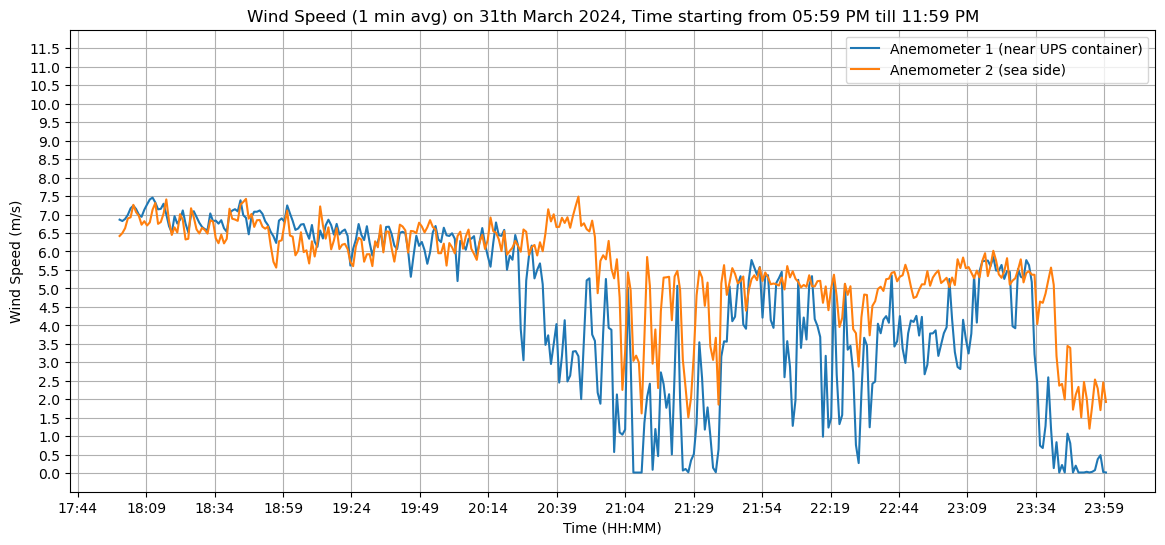

In [20]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np, wind_speed1, label = 'Anemometer 1 (near UPS container)')
plt.plot(time_array_np, wind_speed2, label = 'Anemometer 2 (sea side)')
# plt.plot(time_array_np, np.add(wind_speed1, wind_speed2)/2, label = 'Avg Speed')
# plt.plot(time_array_np2, np.add(wind_speed1_2, wind_speed2_2)/2)
# plt.plot(time_array_np2, wind_speed1_2)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=25))
plt.grid()
plt.ylabel('Wind Speed (m/s)')
plt.ylim((-0.5, 12))
plt.yticks(np.arange(0, 12, step=0.5)) 
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Speed (1 min avg) on 31th March 2024, Time starting from 05:59 PM till 11:59 PM')
plt.savefig('31th_eve_speed.png')

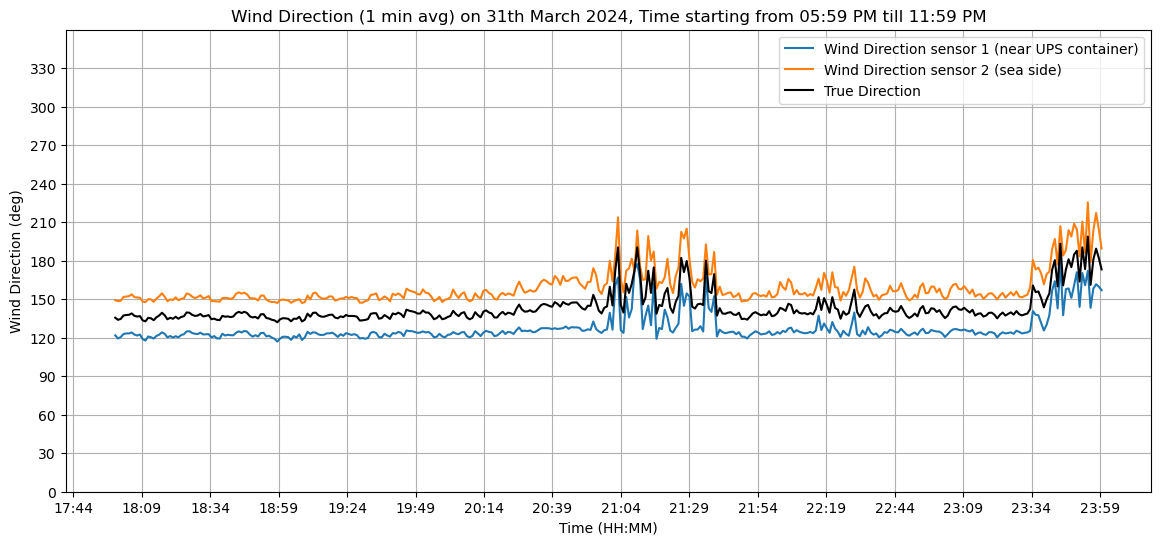

In [21]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np, wind_direc1, label = 'Wind Direction sensor 1 (near UPS container)')
plt.plot(time_array_np, wind_direc2, label = 'Wind Direction sensor 2 (sea side)')
plt.plot(time_array_np, np.add(wind_direc1, wind_direc2)/2, label = 'True Direction', color='black')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=25))
plt.grid()
plt.ylabel('Wind Direction (deg)')
plt.ylim((0,360))
plt.yticks(np.arange(0, 360, step=30))
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Direction (1 min avg) on 31th March 2024, Time starting from 05:59 PM till 11:59 PM')
plt.savefig('31th_eve_direc.png')

In [22]:
# filelist[127:]
FILES = np.concatenate((filelist[126:],filelist[:54]), axis=None)

In [23]:
# files

In [24]:
# FILES
df2 = pd.concat(map(pd.read_csv, FILES), ignore_index=True)
df2

,'Timestamp','Wind_Sensor_1_Speed','Wind_Sensor_2_Speed','Wind_Sensor_1_Direction','Wind_Sensor_2_Direction'
0,31/03/2024 18:29:36.6060,0.278689,0.328370,151.147480,226.195320
1,31/03/2024 18:29:36.6070,0.279009,0.328690,151.193473,226.402296
2,31/03/2024 18:29:36.6080,0.279328,0.329329,151.158978,226.356302
3,31/03/2024 18:29:36.6090,0.280606,0.328051,150.883019,226.045837
4,31/03/2024 18:29:36.6100,0.280287,0.328690,151.331453,226.781753
...,...,...,...,...,...
36330295,01/04/2024 04:35:06.9010,0.212228,0.590939,111.558737,159.583420
36330296,01/04/2024 04:35:06.9020,0.215742,0.593175,111.639225,159.307452
36330297,01/04/2024 04:35:06.9030,0.210630,0.588384,111.466750,158.640528
36330298,01/04/2024 04:35:06.9040,0.210949,0.585509,111.328770,157.893113


In [31]:
ws1_2 = df2["'Wind_Sensor_1_Speed'"].to_numpy()
ws2_2 = df2["'Wind_Sensor_2_Speed'"].to_numpy()
wd1_2 = df2["'Wind_Sensor_1_Direction'"].to_numpy()
wd2_2 = df2["'Wind_Sensor_2_Direction'"].to_numpy()
time_2 = df2["'Timestamp'"].to_numpy()
len(time_2)*0.001/60
# time[-1]

605.505

In [32]:
# # filelist[137]
# wind_speed1_2 = []
# wind_speed2_2 = []
# wind_direc1_2 = []
# wind_direc2_2 = []
# t_2 = []
# # t2 = []
# for j in range(1, 606):
#     t_2.append(j)
#     # t2.append(time[60000*(j - 1)])
#     wind_speed1_2.append(np.average(ws1_2[60000*(j - 1):60000*j - 1]))
#     wind_speed2_2.append(np.average(ws2_2[60000*(j - 1):60000*j - 1]))
#     wind_direc1_2.append(np.average(wd1_2[60000*(j - 1):60000*j - 1]))
#     wind_direc2_2.append(np.average(wd2_2[60000*(j - 1):60000*j - 1]))
# # len(wind_speed1_2)

In [44]:
# filelist[137]
wind_speed1_2 = []
wind_speed2_2 = []
wind_direc1_2 = []
wind_direc2_2 = []
t_2 = []
# t2 = []
for j in range(1, 606):
    t_2.append(j)
    wind_direc1_2.append(np.average(wd1_2[60000*(j - 1):60000*j - 1]))
    wind_direc2_2.append(np.average(wd2_2[60000*(j - 1):60000*j - 1]))
    # t2.append(time[60000*(j - 1)])
    WS1_Avg = np.average(ws1_2[60000*(j - 1):60000*j - 1])
    WS2_Avg = np.average(ws2_2[60000*(j - 1):60000*j - 1])
    
    wind_speed1_2.append(WS1(WS1_Avg))
    wind_speed2_2.append(WS2(WS2_Avg))

In [34]:
today_date_2 = datetime.datetime(2024, 4, 1).date()

# Define start and end time with today's date
start_time_2 = datetime.datetime.combine(today_date_2, datetime.time(hour=0, minute=0, second=0))
end_time_2 = datetime.datetime.combine(today_date_2, datetime.time(hour=10, minute=5, second=6))
# start_time = datetime.datetime.strptime('05:34', '%H:%M')
# end_time = datetime.datetime.strptime('08:32', '%H:%M')

# Define length of array
array_length_2 = len(wind_speed1_2)  # specify the length you desire
# array_length2 = len(wind_speed1_2)
# Calculate time difference
time_diff_2 = end_time_2 - start_time_2

# Calculate time step
time_step_2 = time_diff_2 / (array_length_2 - 1)
# time_step2 = time_diff / (array_length2 - 1)
# Generate time array
time_array_2 = [start_time_2 + i * time_step_2 for i in range(array_length_2)]
# time_array2 = [start_time + i * time_step2 for i in range(array_length2)]
# Convert time array to NumPy array if needed
time_array_np_2 = np.array(time_array_2)
# time_array_np2 = np.array(time_array2)
# print(time_array_np) 
time_array_np_2[-1]

datetime.datetime(2024, 4, 1, 10, 5, 6, 288)

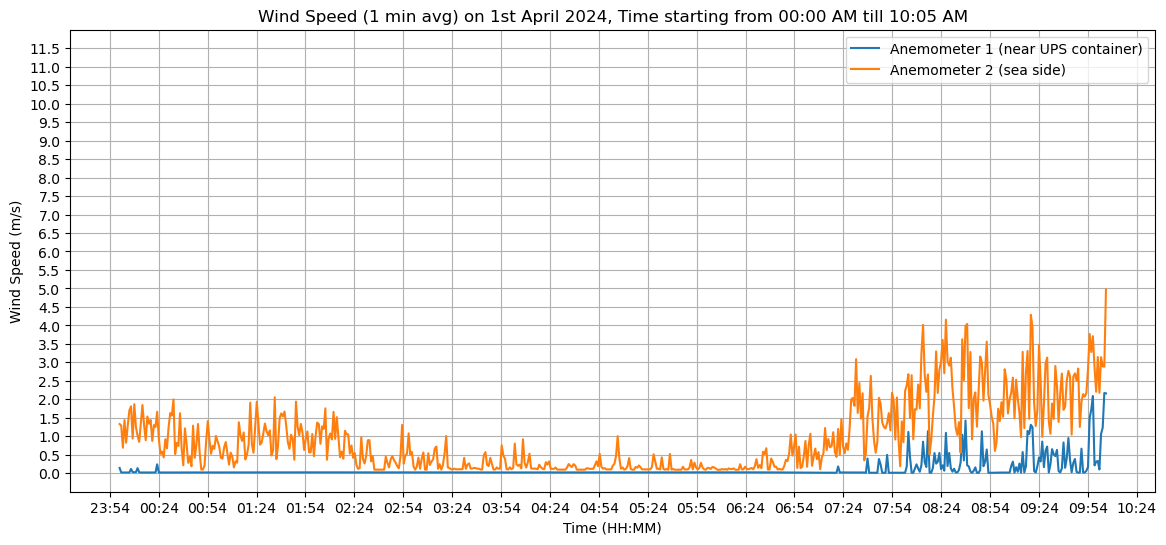

In [35]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np_2, wind_speed1_2, label = 'Anemometer 1 (near UPS container)')
plt.plot(time_array_np_2, wind_speed2_2, label = 'Anemometer 2 (sea side)')
# plt.plot(time_array_np, np.add(wind_speed1, wind_speed2)/2, label = 'Avg Speed')
# plt.plot(time_array_np2, np.add(wind_speed1_2, wind_speed2_2)/2)
# plt.plot(time_array_np2, wind_speed1_2)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=30))
plt.grid()
plt.ylabel('Wind Speed (m/s)')
plt.ylim((-0.5, 12))
plt.yticks(np.arange(0, 12, step=0.5)) 
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Speed (1 min avg) on 1st April 2024, Time starting from 00:00 AM till 10:05 AM')
plt.savefig('1st_morn_speed.png')

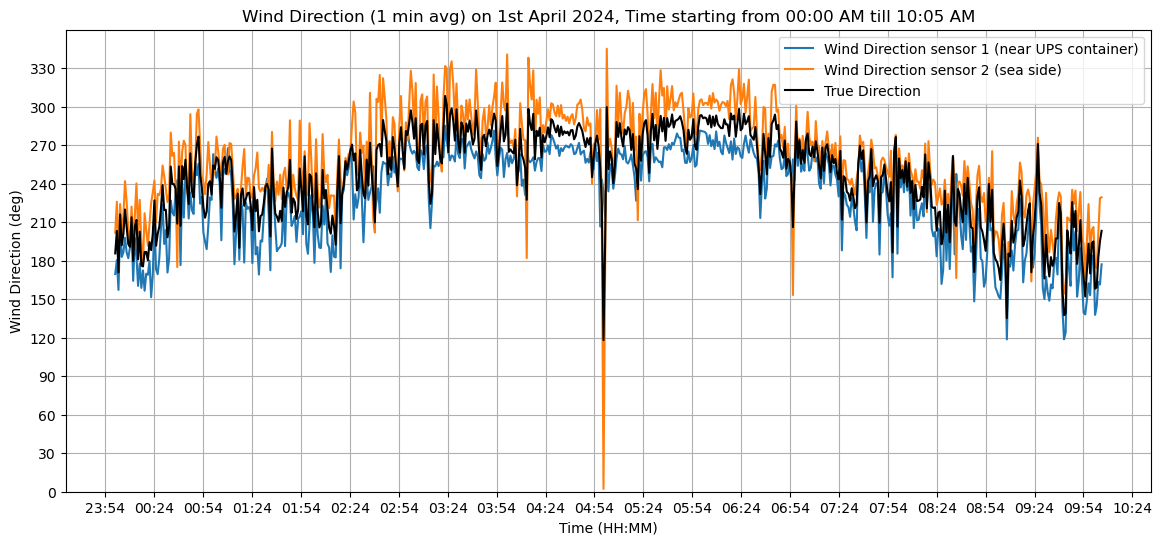

In [36]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np_2, wind_direc1_2, label = 'Wind Direction sensor 1 (near UPS container)')
plt.plot(time_array_np_2, wind_direc2_2, label = 'Wind Direction sensor 2 (sea side)')
plt.plot(time_array_np_2, np.add(wind_direc1_2, wind_direc2_2)/2, label = 'True Direction', color='black')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=30))
plt.grid()
plt.ylabel('Wind Direction (deg)')
plt.ylim((0,360))
plt.yticks(np.arange(0, 360, step=30))
# plt.xlim(4,5)
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Direction (1 min avg) on 1st April 2024, Time starting from 00:00 AM till 10:05 AM')
plt.savefig('1st_morn_direc.png')

In [37]:
time_array_np_2[294]

datetime.datetime(2024, 4, 1, 4, 54, 32, 125968)

In [38]:
294*60*1000

17640000

In [39]:
# # filelist[137]
# wind_speed1_2_2 = []
# wind_speed2_2_2 = []
# wind_direc1_2_2 = []
# wind_direc2_2_2 = []
# t_2_2 = []
# # t2 = []
# for j in range(1, 36331):
#     t_2_2.append(j)
#     # t2.append(time[60000*(j - 1)])
#     wind_speed1_2_2.append(np.average(ws1_2[1000*(j - 1):1000*j - 1]))
#     wind_speed2_2_2.append(np.average(ws2_2[1000*(j - 1):1000*j - 1]))
#     wind_direc1_2_2.append(np.average(wd1_2[1000*(j - 1):1000*j - 1]))
#     wind_direc2_2_2.append(np.average(wd2_2[1000*(j - 1):1000*j - 1]))
# len(wind_speed1_2_2)

In [43]:
# plt.plot(range(1,36331),wind_direc2_2_2)

In [ ]:
# plt.plot(range(14000, 18000), wind_direc2_2_2[14000:18000])

In [41]:
# plt.plot(range(14000000,16000000), wd2_2[14000000:16000000])

In [42]:
500/60

8.333333333333334

In [45]:
df.to_csv('31March2024.csv')

In [46]:
df2.to_csv('1stApril2024.csv')